INTRODUCTION TO PREDICTIVE MAINTENENCE
Predictive maintenance is a proactive maintenance strategy that leverages data analysis, machine learning, and condition monitoring techniques to predict equipment failures before they occur. The primary goal of predictive maintenance is to prevent unexpected downtime, optimize maintenance schedules, and minimize maintenance costs while maximizing asset reliability and performance.


In [224]:
# Basic Libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score
#Oversamplying
from imblearn.over_sampling import RandomOverSampler


from sklearn.preprocessing import MinMaxScaler



#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [61]:
pred_df=pd.read_csv(r"C:\Users\DELL\Documents\PGDA 36\projects\predictive maintenance project\predictive_maintenance.csv")

In [3]:
pred_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
pred_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# Summary Statistics Interpretation

Air Temperature:
The air temperature in the dataset exhibits a relatively narrow distribution, with a mean value of approximately 300.00 Kelvin and a standard deviation of approximately 2.00 Kelvin. The temperature ranges from a minimum of 295.30 Kelvin to a maximum of 304.50 Kelvin, indicating a moderately stable operating environment.

Process Temperature:
In contrast to air temperature, the process temperature shows slightly less variability, with a mean value of approximately 310.01 Kelvin and a standard deviation of approximately 1.48 Kelvin. The process temperature ranges from 305.70 Kelvin to 313.80 Kelvin, suggesting a controlled process environment with minor fluctuations.

Rotational Speed:
The rotational speed of the equipment exhibits a wider distribution, with a mean speed of approximately 1538.78 rpm and a standard deviation of approximately 179.28 rpm. The speed ranges from a minimum of 1168 rpm to a maximum of 2886 rpm, indicating significant variability in the equipment's operating conditions.

Torque:
The torque exerted by the equipment shows moderate variability, with a mean value of approximately 39.99 Nm and a standard deviation of approximately 9.97 Nm. The torque ranges from a minimum of 3.80 Nm to a maximum of 76.60 Nm, suggesting varying levels of mechanical load and stress on the equipment.

Tool Wear:
The amount of tool wear accumulated over time exhibits a wide distribution, with a mean duration of approximately 107.95 minutes and a standard deviation of approximately 63.65 minutes. Tool wear durations range from a minimum of 0 minutes to a maximum of 253 minutes, indicating varying degrees of wear and tear on the equipment's tools.

Target (Assumed Binary):
The target variable, assumed to represent equipment failure (1) or non-failure (0), shows a low overall failure rate, with a mean value of approximately 0.03 and a standard deviation of approximately 0.18. The majority of observations fall into the non-failure category, with only a small proportion indicating equipment failure.

In summary, the dataset provides insights into the operating conditions, mechanical stress, and performance of the equipment, as well as the occurrence of equipment failures. Analysis of these variables can help identify patterns, trends, and potential indicators of equipment failure, facilitating predictive maintenance and optimization of maintenance strategies.

In [5]:
#checking for null values
pred_df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
pred_df[pred_df.duplicated()]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


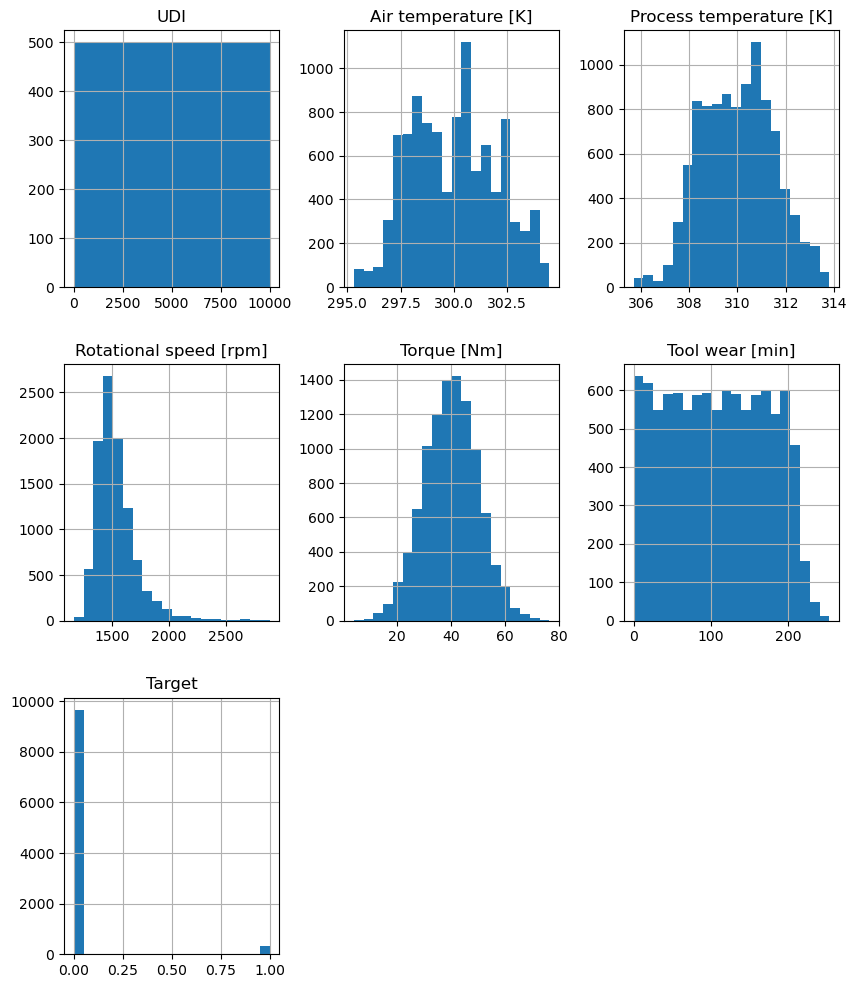

In [7]:
pred_df.hist(figsize=(10,12),bins=20)

plt.show()

In [326]:
pred_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rad/sec]', 'process_power', 'Heat_difference',
       'strain'],
      dtype='object')

Featuer Name = Air temperature [K]


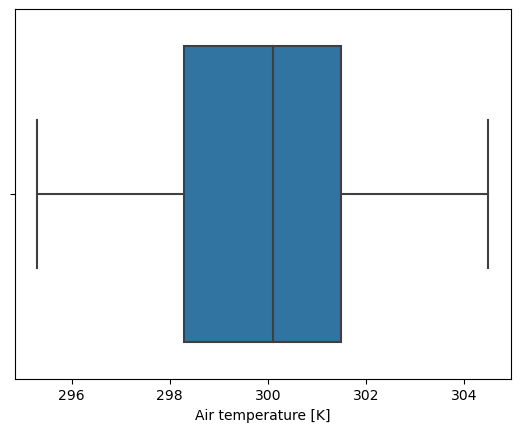

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64

Featuer Name = Process temperature [K]


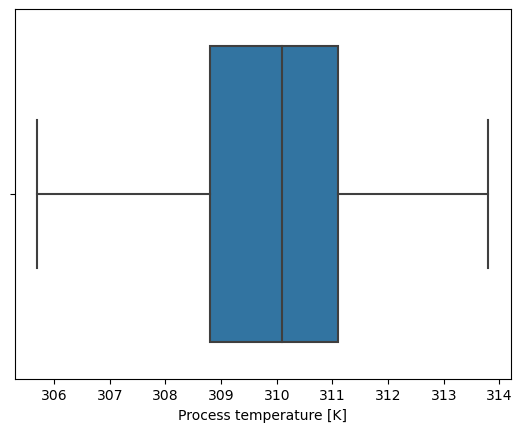

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64

Featuer Name = Rotational speed [rpm]


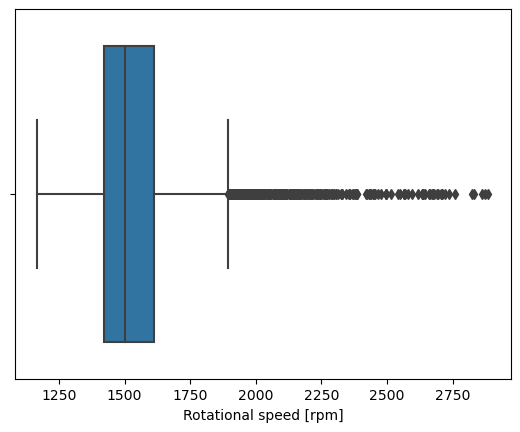

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

Featuer Name = Torque [Nm]


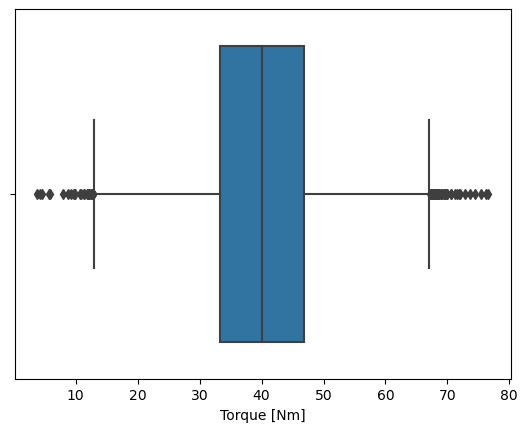

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64

Featuer Name = Tool wear [min]


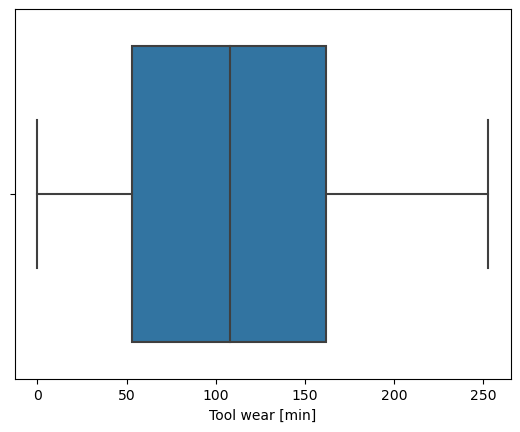

count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        108.000000
75%        162.000000
max        253.000000
Name: Tool wear [min], dtype: float64

In [328]:
numerical_features=['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']
for i in numerical_features:
    print(f'Featuer Name = {i}')
    sns.boxplot(x = pred_df[i])
    plt.show()
    display(pred_df[i].describe())

In [19]:
pred_df['product_type'] = pred_df['Product ID'].apply(lambda x: 'M' if x.startswith('M') else ('L' if x.startswith('L') else 'H'))

In [20]:
pred_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,product_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,M
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,L
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,L
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,L
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,L
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,M
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,H
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,M
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,H


In [23]:
pred_df.insert(2,'machinee_type',pred_df['product_type'] )

In [29]:
pred_df.drop('machinee_type',axis=1,inplace=True)

In [30]:
pred_df.drop('product_type',axis=1,inplace=True)

In [31]:
pred_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [33]:
pred_df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

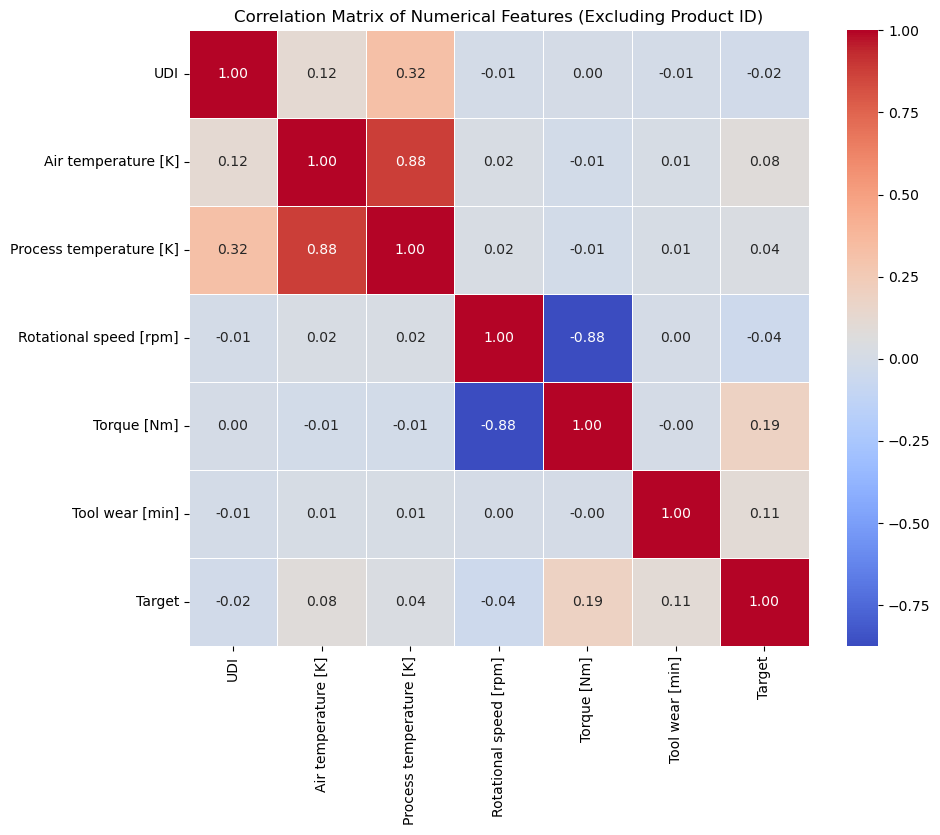

In [35]:
numeric_columns = pred_df.select_dtypes(include=['number']).columns

# Compute the correlation matrix
corr_matrix = pred_df[numeric_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (Excluding Product ID)')
plt.show()

# FAILIURE ANALYSIS

In [62]:
pred_df_fail=pred_df[pred_df['Target']==1]
pred_df_fail.shape

(339, 10)

In [63]:
pred_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [64]:
pred_df_fail['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

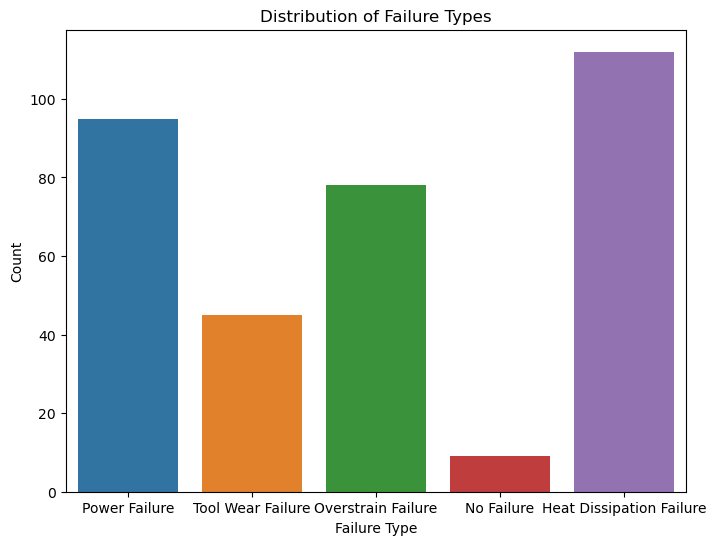

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=pred_df_fail)
plt.title('Distribution of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

In [47]:
pred_df_fail[pred_df_fail['Failure Type']=='No Failure']

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L,297.2,308.1,1431,49.7,210,1,No Failure


#PRE ENGINEERING
We've identified discrepancies in the data where the 'Target' column incorrectly indicates failure (1) for entries categorized as 'No Failure'. This misinterpretation needs to be corrected to ensure data accuracy. We'll address this issue by updating the 'Target' column to 0 for all rows where the 'Failure Type' is 'No Failure'."

In [65]:
pred_df.loc[pred_df['Failure Type'] == 'No Failure', 'Target'] = 0

In [66]:
pred_df[pred_df['Failure Type']=='No Failure']

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [48]:
pred_df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [49]:
pred_df[pred_df['Failure Type']=='Random Failures']

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [67]:
pred_df.loc[pred_df['Failure Type'] == 'Random Failures', 'Target'] = 1

In [68]:
pred_df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

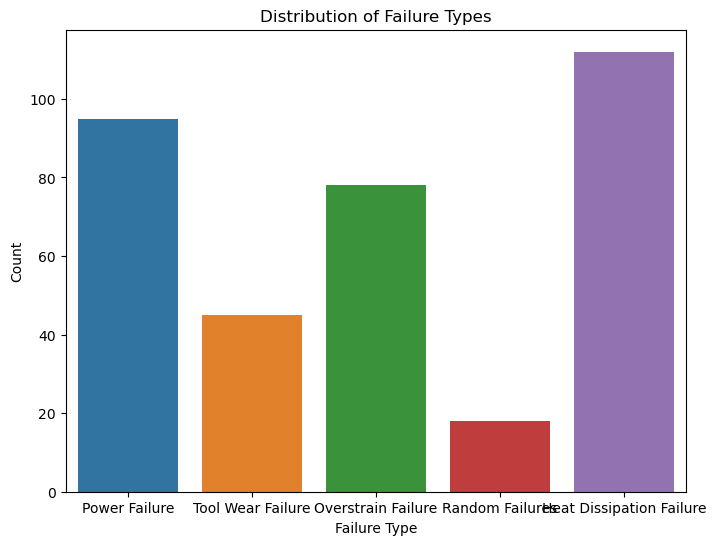

In [348]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=pred_df_fail)
plt.title('Distribution of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

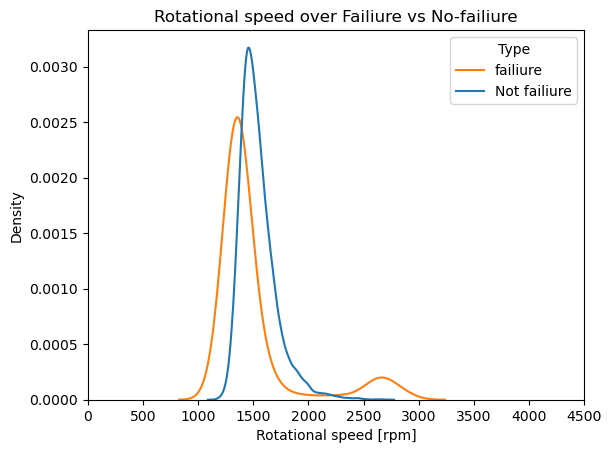

In [333]:
sns.kdeplot(x = 'Rotational speed [rpm]',data =pred_df ,hue = 'Target',common_norm = False)
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Density')
plt.xticks(np.arange(0,5000,500))
plt.title('Rotational speed over Failiure vs No-failiure')
plt.legend(title = 'Type', labels = ['failiure','Not failiure'])

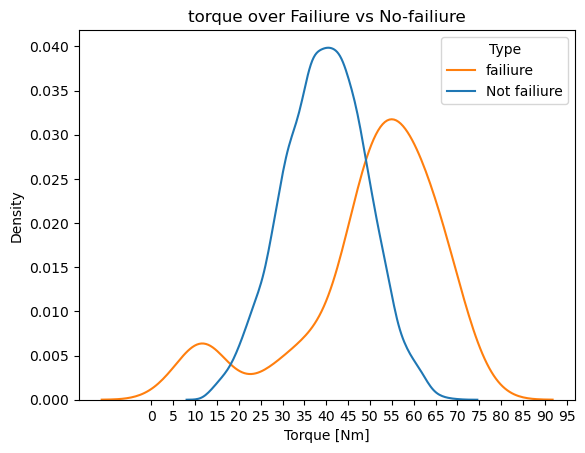

In [336]:
sns.kdeplot(x = 'Torque [Nm]',data =pred_df ,hue = 'Target',common_norm = False)
plt.xlabel('Torque [Nm]')
plt.ylabel('Density')
plt.xticks(np.arange(0,100,5))
plt.title('torque over Failiure vs No-failiure')
plt.legend(title = 'Type', labels = ['failiure','Not failiure'])

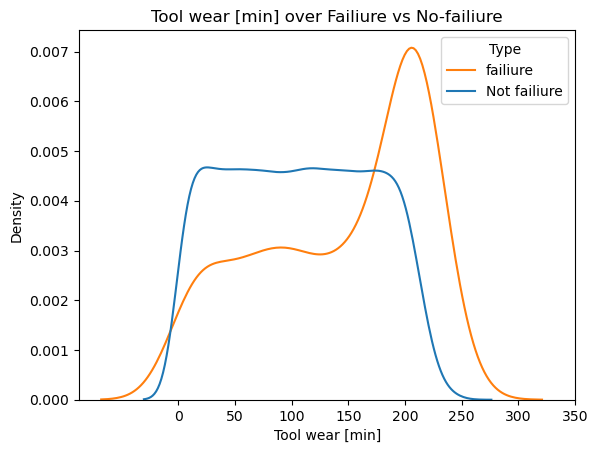

In [340]:
sns.kdeplot(x = 'Tool wear [min]',data =pred_df ,hue = 'Target',common_norm = False)
plt.xlabel('Tool wear [min]')
plt.ylabel('Density')
plt.xticks(np.arange(0,400,50))
plt.title('Tool wear [min] over Failiure vs No-failiure')
plt.legend(title = 'Type', labels = ['failiure','Not failiure'])

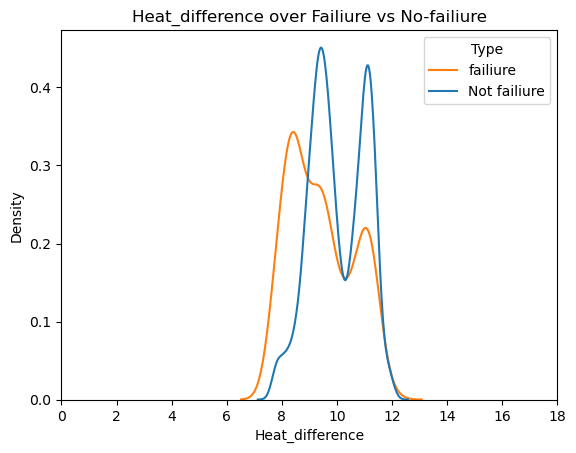

In [342]:
sns.kdeplot(x = 'Heat_difference',data =pred_df ,hue = 'Target',common_norm = False)
plt.xlabel('Heat_difference')
plt.ylabel('Density')
plt.xticks(np.arange(0,20,2))
plt.title('Heat_difference over Failiure vs No-failiure')
plt.legend(title = 'Type', labels = ['failiure','Not failiure'])

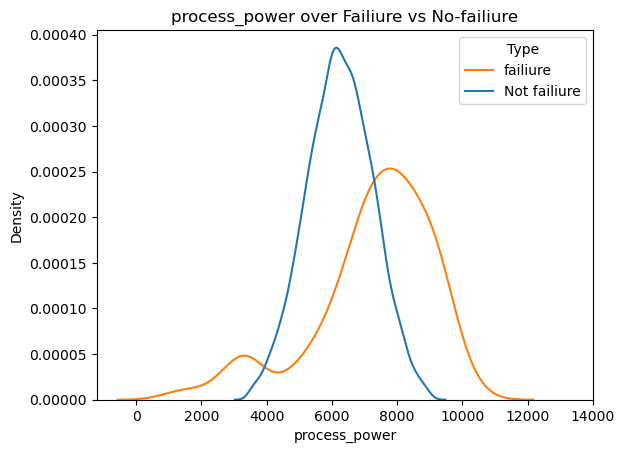

In [347]:
sns.kdeplot(x = 'process_power',data =pred_df ,hue = 'Target',common_norm = False)
plt.xlabel('process_power')
plt.ylabel('Density')
plt.xticks(np.arange(0,15000,2000))
plt.title('process_power over Failiure vs No-failiure')
plt.legend(title = 'Type', labels = ['failiure','Not failiure'])

In [329]:
pred_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rad/sec]', 'process_power', 'Heat_difference',
       'strain'],
      dtype='object')

# FAILURE ANALYSIS

In [186]:
pred_df_fail=pred_df[pred_df['Target']==1]
pred_df_fail.shape

(348, 14)

In [70]:
pred_df_fail['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Random Failures              18
Name: count, dtype: int64

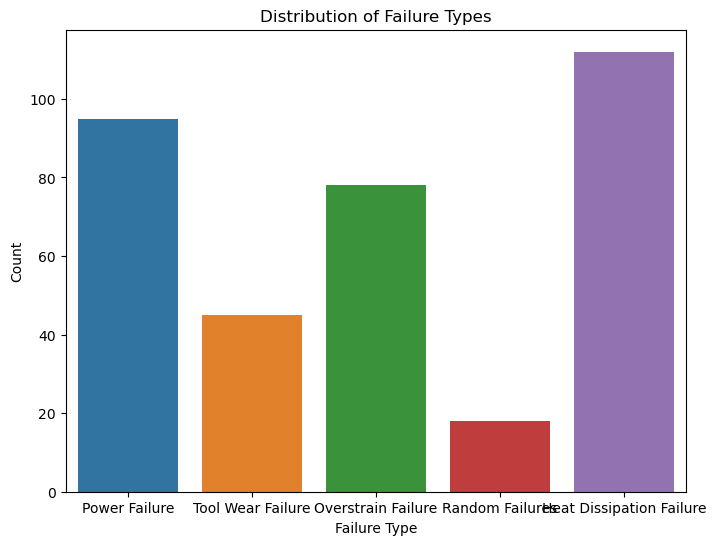

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=pred_df_fail)
plt.title('Distribution of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

# Finding corelation of failiure and reason

In [107]:
columns_todrop=['Product ID','Type']
corelaton_1=pred_df_fail.drop(columns=columns_todrop,axis=1)

In [108]:
corelaton_2=pd.get_dummies(corelaton_1)

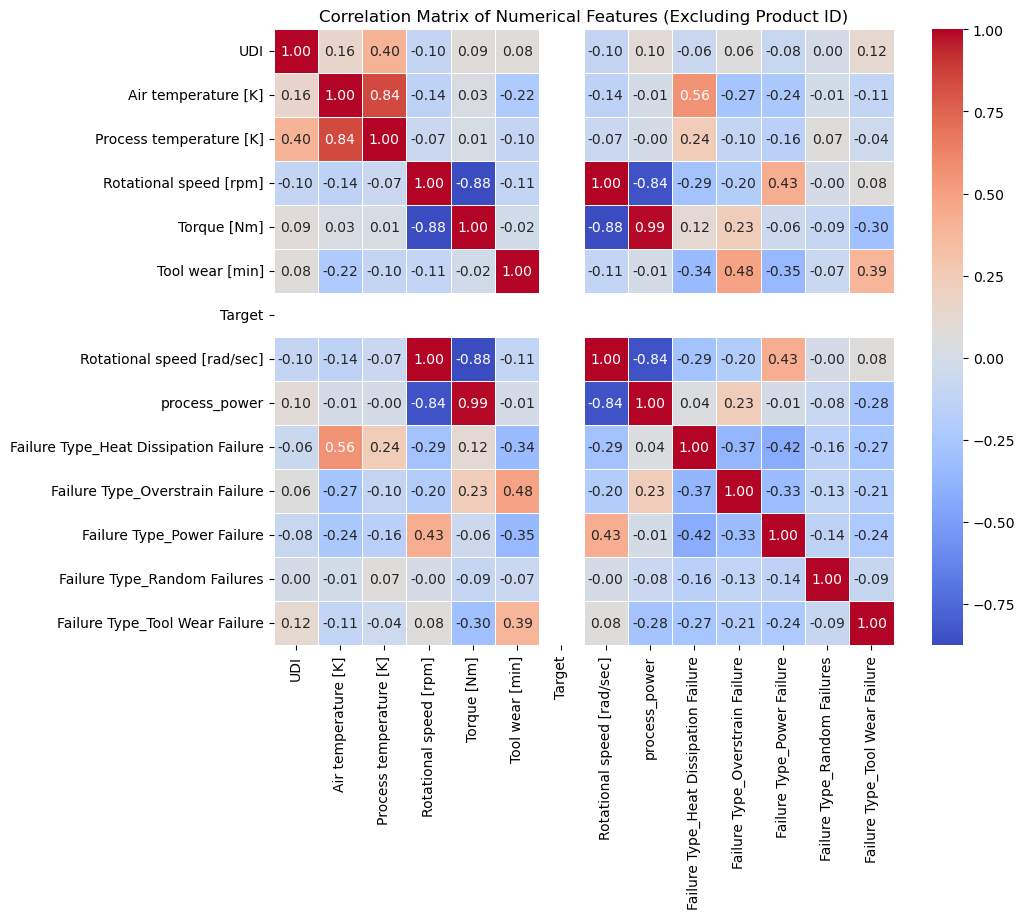

In [109]:
corr_matrix = corelaton_2.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (Excluding Product ID)')
plt.show()

TOOL WEAR FAILIURE- There is a positive corelation between tool wear failiure and tool wear[min].Also we can see a negtive relation between torque and tool wear failiure
Power failiure- There is a positive realtion betwee power failiure and rotaional speed(rpm)


# TOOL WEAR FAILURE ANALYSIS

In [359]:
tool_wear_failure=pred_df_fail[pred_df_fail['Failure Type']=='Tool Wear Failure']

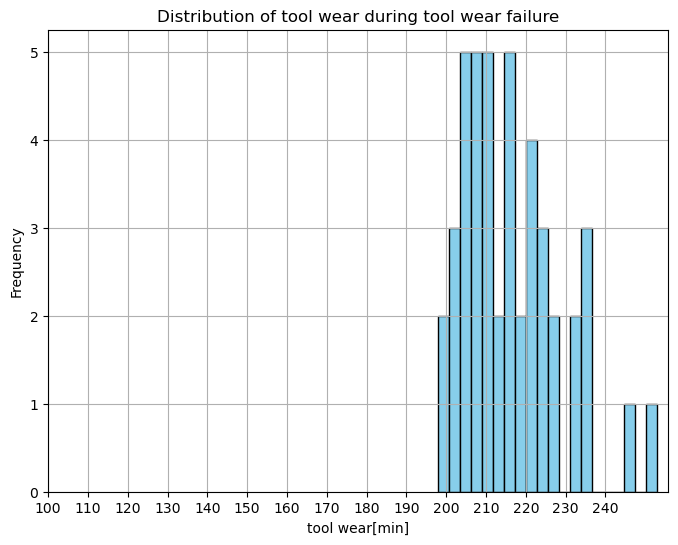

In [364]:
plt.figure(figsize=(8, 6))
plt.hist(tool_wear_failure['Tool wear [min]'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of tool wear during tool wear failure')
plt.xticks(np.arange(100,250,10))
plt.xlabel('tool wear[min]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [88]:
pred_df['Tool wear [min]'].describe()

count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        108.000000
75%        162.000000
max        253.000000
Name: Tool wear [min], dtype: float64

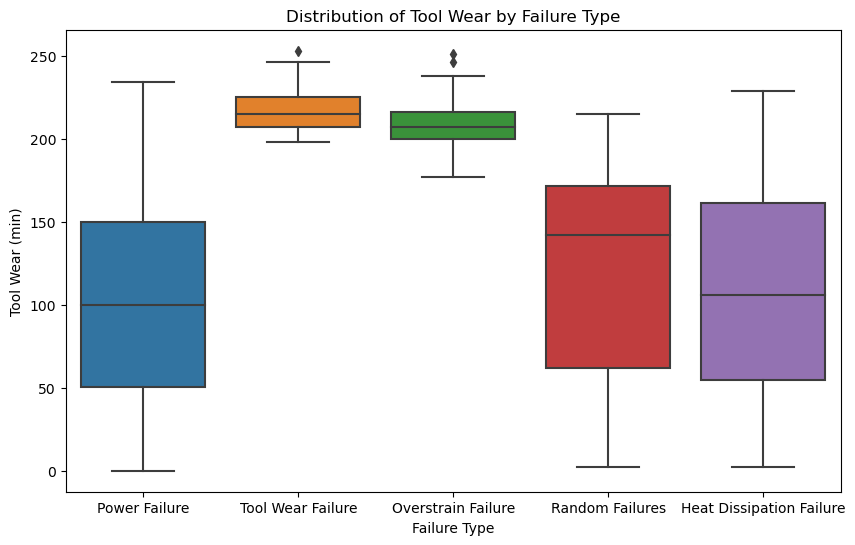

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure Type', y='Tool wear [min]', data=pred_df_fail)
plt.title('Distribution of Tool Wear by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Tool Wear (min)')
plt.show()

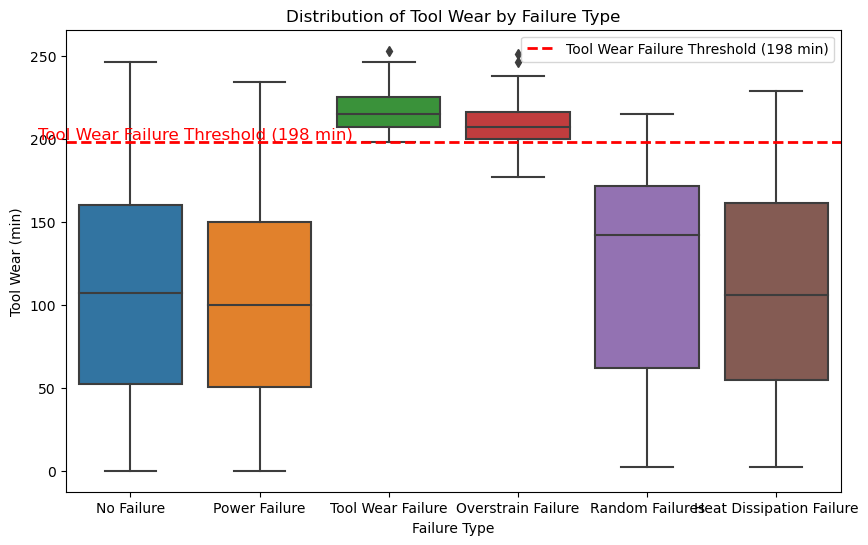

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a box plot to visualize the distribution of 'Tool Wear' by 'Failure Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure Type', y='Tool wear [min]', data=pred_df)

# Add a horizontal line at 198 minutes to indicate the threshold for failure
plt.axhline(y=198, color='r', linestyle='--', linewidth=2, label='Tool Wear Failure Threshold (198 min)')

# Annotate the line
plt.text(0.5, 200, 'Tool Wear Failure Threshold (198 min)', color='red', fontsize=12, ha='center')

plt.title('Distribution of Tool Wear by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Tool Wear (min)')
plt.legend()
plt.show()

# power failiure

In [351]:
power_failure=pred_df_fail[pred_df_fail['Failure Type']=='Power Failure']

In [352]:
power_failure.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rad/sec]', 'process_power', 'Heat_difference',
       'strain'],
      dtype='object')

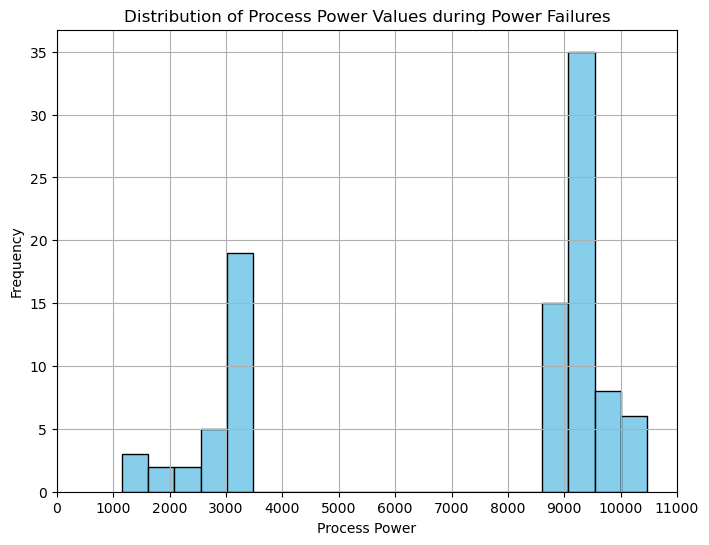

In [358]:
plt.figure(figsize=(8, 6))
plt.hist(power_failure['process_power'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Process Power Values during Power Failures')
plt.xticks(np.arange(0,12000,1000))
plt.xlabel('Process Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
np.arange()

In [94]:
pred_df['Rotational speed [rpm]'].describe()


count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

In [95]:
pred_df_fail['process_power']=pred_df_fail['Rotational speed [rpm]']*pred_df_fail['Torque [Nm]']

In [96]:
pred_df_fail

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,process_power
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure,13160.6
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure,92637.0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure,60091.5
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure,77817.4
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure,73847.6
...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure,36790.2
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure,86309.8
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure,82824.0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure,75005.7


In [116]:
power_failure_df =pred_df_fail[pred_df_fail['Failure Type']=='Power Failure']

In [100]:
pred_df.drop('process_power',axis=1,inplace=True)

In [101]:
import math

# Define a function to convert RPM to radians per second
def rpm_to_radians_per_second(rpm):
    return (2 * math.pi * rpm) / 60

# Apply the conversion function to create a new column 'Rotational speed [rad/sec]'
pred_df['Rotational speed [rad/sec]'] = pred_df['Rotational speed [rpm]'].apply(rpm_to_radians_per_second)

In [102]:
pred_df['process_power']=pred_df['Rotational speed [rad/sec]']*pred_df['Torque [Nm]']

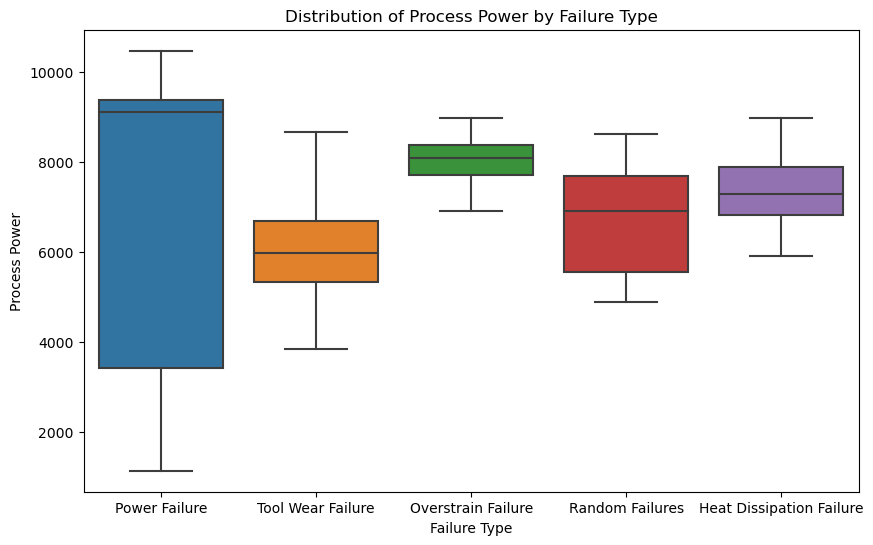

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure Type', y='process_power', data=pred_df_fail)
plt.title('Distribution of Process Power by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Process Power')
plt.show()

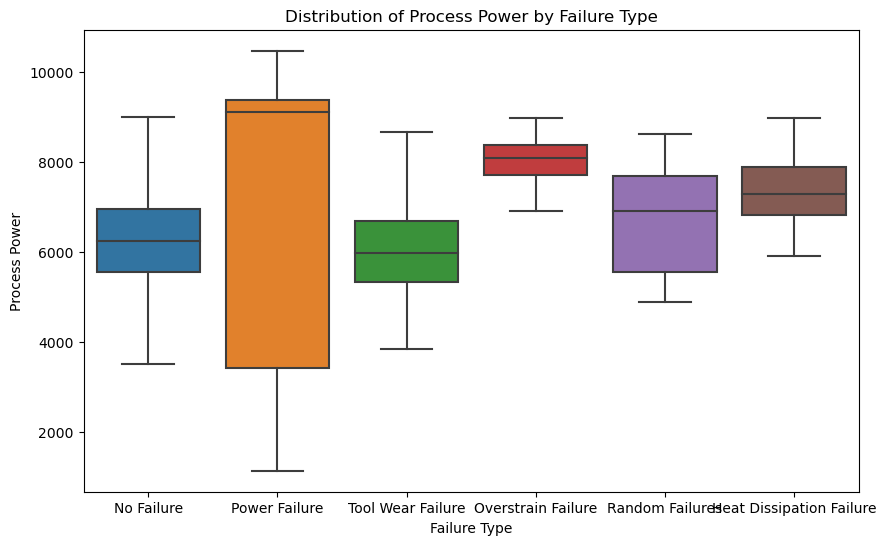

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure Type', y='process_power', data=pred_df)
plt.title('Distribution of Process Power by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Process Power')
plt.show()

In [123]:
pred_df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rad/sec]', 'process_power'],
      dtype='object')

In [152]:
pred_df_run=pred_df[pred_df['Target']==0]
pred_df_run.shape

(9652, 13)

In [153]:
min_power_failure = pred_df_run['process_power'].min()
max_power_failure =pred_df_run['process_power'].max()
print("Range of values in process power that cause power failure:")
print("Minimum:", min_power_failure)
print("Maximum:", max_power_failure)

Range of values in process power that cause power failure:
Minimum: 3515.033772322012
Maximum: 8998.024014705741



From the graph we can seee that below 3515 wats and above 8998 watts we could see a power failiure


# heat dissipation failure (HDF) analysis

Heat dissipaton failiure takes place when the difference between air temperature and process temperage is very less and the rpm of the machine is very low to descipate the heat.

In [144]:
pred_df['Heat_difference']=pred_df['Process temperature [K]']-pred_df['Air temperature [K]']

In [145]:
pred_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Rotational speed [rad/sec],process_power,Heat_difference
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,162.420340,6951.590560,10.5
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,147.445415,6826.722724,10.5
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,156.870193,7749.387543,10.4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,150.063409,5927.504659,10.4
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,147.445415,5897.816608,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,167.970487,4955.129373,9.6
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,170.902640,5434.703963,9.5
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,172.263997,5753.617506,9.6
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,147.445415,7151.102638,9.7


In [142]:
pred_df_fail['Heat_difference']=pred_df['Process temperature [K]']-pred_df['Air temperature [K]']

In [143]:
pred_df_fail[pred_df_fail['Failure Type']=='Heat Dissipation Failure']

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Rotational speed [rad/sec],process_power,Heat_difference
3236,3237,M18096,M,300.8,309.4,1342,62.4,113,1,Heat Dissipation Failure,140.533911,8769.316070,8.6
3760,3761,L50940,L,302.3,310.9,1377,46.8,166,1,Heat Dissipation Failure,144.199103,6748.518011,8.6
3787,3788,L50967,L,302.3,310.8,1377,47.3,22,1,Heat Dissipation Failure,144.199103,6820.617562,8.5
3793,3794,L50973,L,302.3,310.9,1379,49.3,34,1,Heat Dissipation Failure,144.408542,7119.341136,8.6
3806,3807,M18666,M,302.3,310.9,1360,44.0,67,1,Heat Dissipation Failure,142.418867,6266.430146,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,4834,L52013,L,303.4,311.9,1377,41.6,34,1,Heat Dissipation Failure,144.199103,5998.682676,8.5
4836,4837,L52016,L,303.3,311.8,1315,62.0,42,1,Heat Dissipation Failure,137.706478,8537.801635,8.5
4840,4841,L52020,L,303.4,311.9,1298,63.9,59,1,Heat Dissipation Failure,135.926242,8685.686873,8.5
4844,4845,M19704,M,303.4,311.8,1316,50.9,69,1,Heat Dissipation Failure,137.811198,7014.589965,8.4


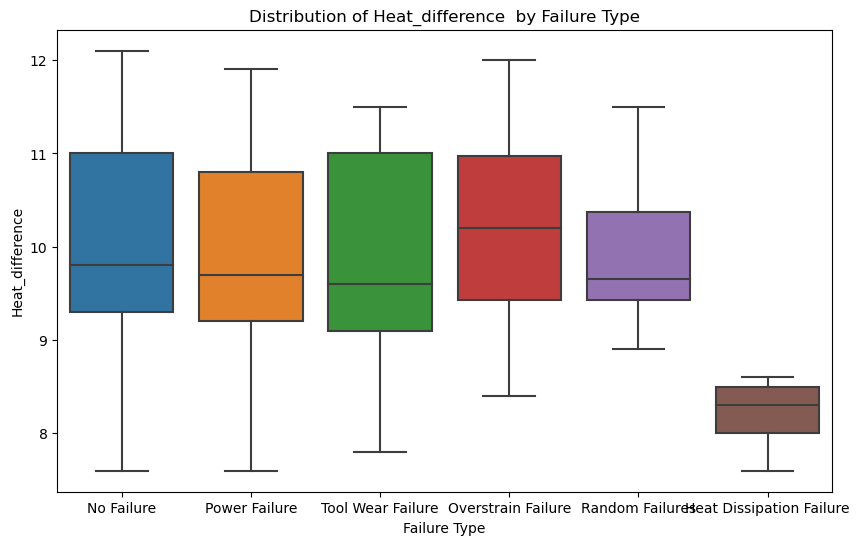

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure Type', y='Heat_difference', data=pred_df)
plt.title('Distribution of Heat_difference  by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Heat_difference')
plt.show()

In [139]:
pred_df_fail['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Random Failures              18
Name: count, dtype: int64

In [149]:
min_heat_dissipation_failure = pred_df_fail['Heat_difference'].min()
max_heat_dissipation_failure =pred_df_fail['Heat_difference'].max()
print("Range of values in process power that cause power failure:")
print("Minimum:",min_heat_dissipation_failure )
print("Maximum:", max_heat_dissipation_failure)

Range of values in process power that cause power failure:
Minimum: 7.599999999999966
Maximum: 12.0


In [154]:
min_heat_dissipation_failure = pred_df_run['Heat_difference'].min()
max_heat_dissipation_failure =pred_df_run['Heat_difference'].max()
print("Range of values in process power that cause power failure:")
print("Minimum:",min_heat_dissipation_failure )
print("Maximum:", max_heat_dissipation_failure)

Range of values in process power that cause power failure:
Minimum: 7.599999999999966
Maximum: 12.100000000000023


We can see that there are other factors which involve other than the  heat difference.

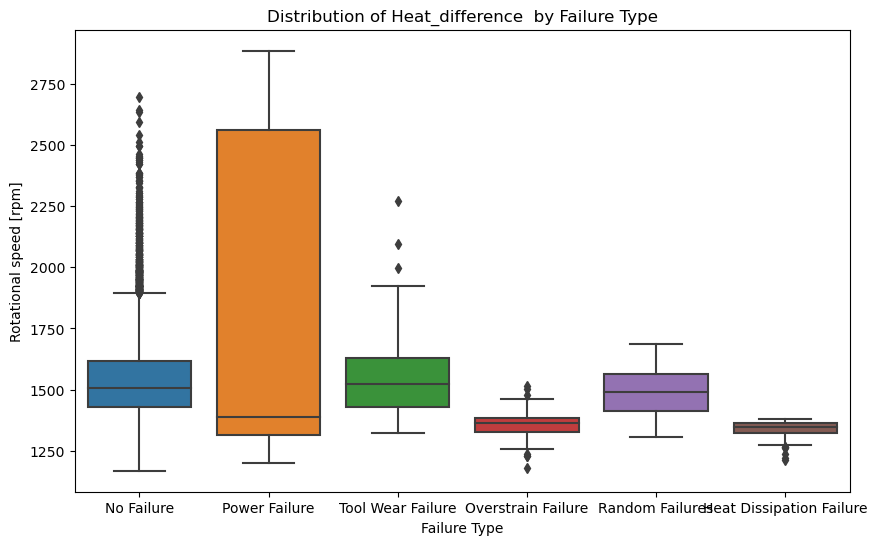

In [157]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure Type', y='Rotational speed [rpm]', data=pred_df)
plt.title('Distribution of Heat_difference  by Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Rotational speed [rpm]')
plt.show()

In [168]:
pred_df_heatfail=pred_df_fail[pred_df_fail['Failure Type']=='Heat Dissipation Failure']

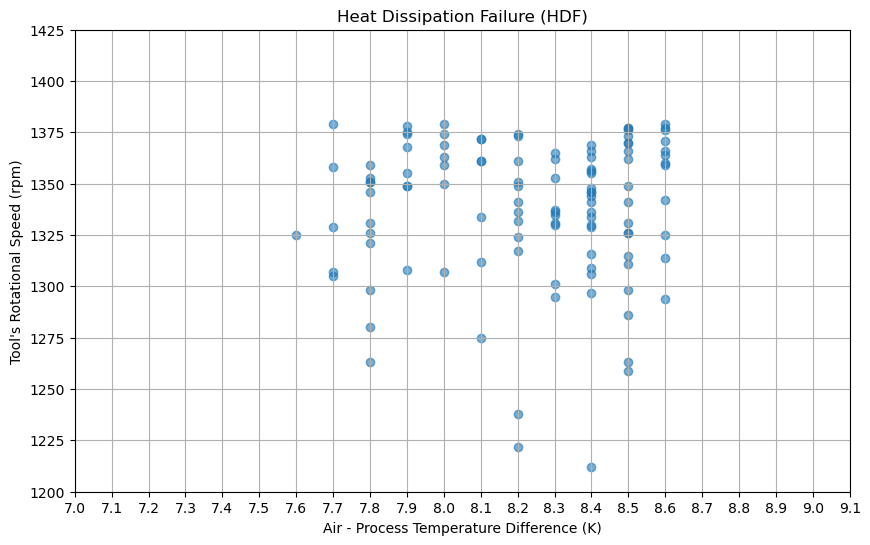

In [371]:


# Plot scatter plot of process temperature difference vs rotational speed
plt.figure(figsize=(10, 6))
plt.scatter(
    pred_df_heatfail['Heat_difference'],
    pred_df_heatfail['Rotational speed [rpm]'],
    cmap='red',
    alpha=0.6,
)
plt.title('Heat Dissipation Failure (HDF)')
plt.xlabel('Air - Process Temperature Difference (K)')
plt.xticks(np.arange(7,9.2,0.1))
plt.yticks(np.arange(1200,1450,25))
plt.ylabel("Tool's Rotational Speed (rpm)")
plt.grid(True)
plt.show()

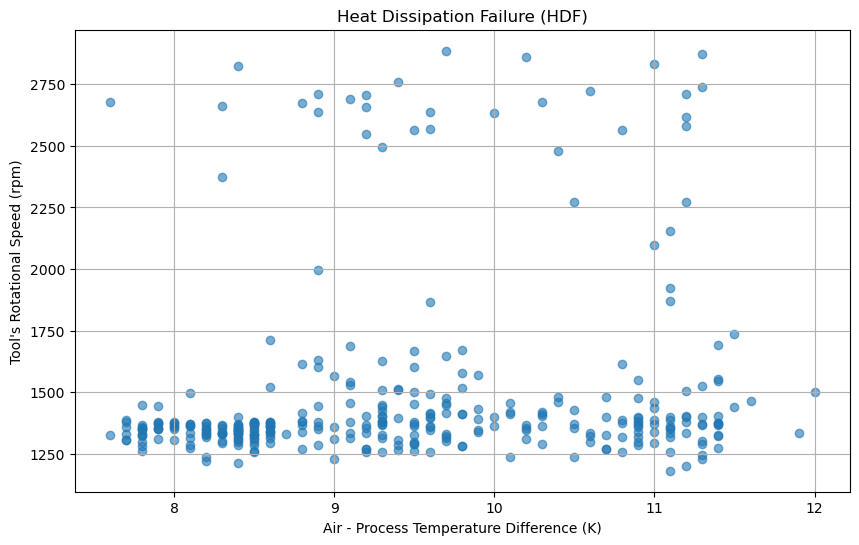

In [349]:
plt.figure(figsize=(10, 6))
plt.scatter(
    pred_df_fail['Heat_difference'],
    pred_df_fail['Rotational speed [rpm]'],
    cmap='coolwarm',
    alpha=0.6,
)
plt.title('Heat Dissipation Failure (HDF)')
plt.xlabel('Air - Process Temperature Difference (K)')
plt.ylabel("Tool's Rotational Speed (rpm)")
plt.grid(True)
plt.show()

In [174]:
pred_df_fail[(pred_df_fail['Heat_difference']  < 8.7)& (pred_df_fail['Rotational speed [rpm]'] < 1375)&(pred_df_fail['Failure Type']=='Heat Dissipation Failure')]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Rotational speed [rad/sec],process_power,Heat_difference
3236,3237,M18096,M,300.8,309.4,1342,62.4,113,1,Heat Dissipation Failure,140.533911,8769.316070,8.6
3806,3807,M18666,M,302.3,310.9,1360,44.0,67,1,Heat Dissipation Failure,142.418867,6266.430146,8.6
3814,3815,M18674,M,302.1,310.6,1326,59.1,88,1,Heat Dissipation Failure,138.858395,8206.531162,8.5
3829,3830,H33243,H,302.3,310.9,1366,48.4,130,1,Heat Dissipation Failure,143.047185,6923.483778,8.6
4078,4079,H33492,H,302.1,310.7,1294,62.4,101,1,Heat Dissipation Failure,135.507363,8455.659459,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,4832,L52011,L,303.5,312.0,1366,54.5,30,1,Heat Dissipation Failure,143.047185,7796.071609,8.5
4836,4837,L52016,L,303.3,311.8,1315,62.0,42,1,Heat Dissipation Failure,137.706478,8537.801635,8.5
4840,4841,L52020,L,303.4,311.9,1298,63.9,59,1,Heat Dissipation Failure,135.926242,8685.686873,8.5
4844,4845,M19704,M,303.4,311.8,1316,50.9,69,1,Heat Dissipation Failure,137.811198,7014.589965,8.4


We can see that heat disscipation failiure has taken place maximum in conditions when the temperature is less than 8.7 and the rotational speed is less than 1375

# Overstrain failiure analysis

In [178]:
pred_df_overstain=pred_df_fail[pred_df_fail['Failure Type']=='Overstrain Failure']

In [175]:
pred_df_fail['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Random Failures              18
Name: count, dtype: int64

In [179]:
pred_df_overstain.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Rotational speed [rad/sec]', 'process_power', 'Heat_difference'],
      dtype='object')

In [180]:
pred_df_overstain['strain']=pred_df_overstain['Torque [Nm]']*pred_df_overstain['Tool wear [min]']

In [182]:
pred_df['strain']=pred_df['Torque [Nm]']*pred_df['Tool wear [min]']

In [191]:
pred_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Rotational speed [rad/sec],process_power,Heat_difference,strain
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,162.420340,6951.590560,10.5,0.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,147.445415,6826.722724,10.5,138.9
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,156.870193,7749.387543,10.4,247.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,150.063409,5927.504659,10.4,276.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,147.445415,5897.816608,10.5,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,167.970487,4955.129373,9.6,413.0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,170.902640,5434.703963,9.5,540.6
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,172.263997,5753.617506,9.6,734.8
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,147.445415,7151.102638,9.7,1212.5


In [196]:
pred_df_overstain[pred_df_overstain['Type']=='H']

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Rotational speed [rad/sec],process_power,Heat_difference,strain
5399,5400,H34813,H,302.8,312.4,1411,53.8,246,1,Overstrain Failure,147.759574,7949.465107,9.6,13234.8


In [373]:
pred_df_overstain[pred_df_overstain['Type']=='L']

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Rotational speed [rad/sec],process_power,Heat_difference,strain
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure,134.250726,8149.019072,9.8,13111.2
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure,147.864294,7733.302588,9.8,11401.4
242,243,L47422,L,298.0,308.2,1348,58.8,202,1,Overstrain Failure,141.162230,8300.339118,10.2,11877.6
248,249,L47428,L,298.0,308.3,1362,56.8,216,1,Overstrain Failure,142.628306,8101.287808,10.3,12268.8
249,250,L47429,L,298.0,308.3,1405,56.2,218,1,Overstrain Failure,147.131256,8268.776584,10.3,12251.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,9664,L56843,L,299.1,310.1,1435,48.8,229,1,Overstrain Failure,150.272849,7333.315012,11.0,11175.2
9664,9665,L56844,L,299.1,310.2,1317,54.8,231,1,Overstrain Failure,137.915917,7557.792279,11.1,12658.8
9667,9668,L56847,L,299.2,310.3,1352,48.9,238,1,Overstrain Failure,141.581109,6923.316226,11.1,11638.2
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure,142.418867,8673.308998,10.9,11388.3


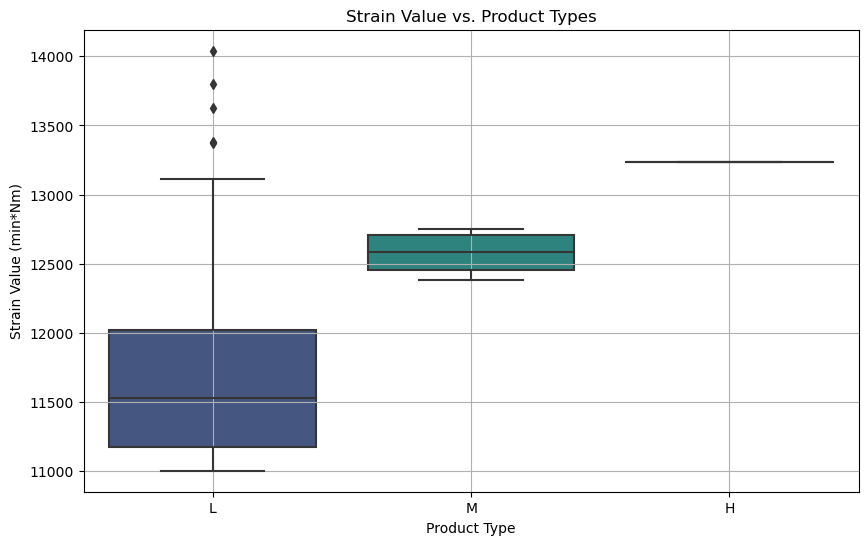

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pred_df_overstain, x='Type', y='strain', palette='viridis')
plt.title('Strain Value vs. Product Types')
plt.xlabel('Product Type')
plt.ylabel('Strain Value (min*Nm)')
plt.grid(True)
plt.show()

If the product of tool wear and torque exceeds 
11,000 minNm for the L product variant 
12,000minNm for M, 13,000minNm for H), the process fails due 
to overstrain.  

# MACHINE LEARNING 

In [ ]:
#KEEPING ONLY IMPORTANT DATA WITH US

In [239]:
drop_columns=['UDI','Product ID','Rotational speed [rad/sec]','process_power','Heat_difference','strain']
final_features=pred_df.drop(columns=drop_columns,axis=1)

In [214]:
final_features

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [216]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
final_features['Type'] = label_encoder.fit_transform(final_features['Type'])

In [217]:
final_features

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,No Failure
9996,0,298.9,308.4,1632,31.8,17,0,No Failure
9997,2,299.0,308.6,1645,33.4,22,0,No Failure
9998,0,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
pd.get

In [218]:
final_features = pd.get_dummies(final_features, columns=['Failure Type'], prefix='Failure_Type_OneHot',drop_first=True)


In [219]:
final_features

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure_Type_OneHot_No Failure,Failure_Type_OneHot_Overstrain Failure,Failure_Type_OneHot_Power Failure,Failure_Type_OneHot_Random Failures,Failure_Type_OneHot_Tool Wear Failure
0,2,298.1,308.6,1551,42.8,0,0,True,False,False,False,False
1,1,298.2,308.7,1408,46.3,3,0,True,False,False,False,False
2,1,298.1,308.5,1498,49.4,5,0,True,False,False,False,False
3,1,298.2,308.6,1433,39.5,7,0,True,False,False,False,False
4,1,298.2,308.7,1408,40.0,9,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,True,False,False,False,False
9996,0,298.9,308.4,1632,31.8,17,0,True,False,False,False,False
9997,2,299.0,308.6,1645,33.4,22,0,True,False,False,False,False
9998,0,299.0,308.7,1408,48.5,25,0,True,False,False,False,False


#undersampling using imblearn

In [240]:
final_features

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [244]:
drop_columns=['Type','Air temperature [K]','Process temperature [K]','Failure Type']
final_features_1=final_features.drop(columns=drop_columns,axis=1)

In [245]:
final_features_1

,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1551,42.8,0,0
1,1408,46.3,3,0
2,1498,49.4,5,0
3,1433,39.5,7,0
4,1408,40.0,9,0
...,...,...,...,...
9995,1604,29.5,14,0
9996,1632,31.8,17,0
9997,1645,33.4,22,0
9998,1408,48.5,25,0


In [263]:
X=final_features_1.drop('Target',axis=1)
y=final_features_1['Target']

In [255]:
X.columns.to_list()

['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [264]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', y.value_counts())
print('Resample dataset shape', y_rus.value_counts())

original dataset shape: Target
0    9652
1     348
Name: count, dtype: int64
Resample dataset shape Target
0    348
1    348
Name: count, dtype: int64


In [265]:
X_train,X_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=0.3,random_state=0)

In [266]:





dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)

# Evaluate Logistic Regression performance
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))


Decision Tree:
Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.80      0.83      0.82       101

    accuracy                           0.82       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.82      0.82      0.82       209



In [382]:
# Train Logistic Regression
lr_rusm = LogisticRegression()
lr_rusm.fit(X_train, y_train)

# Predict on the original test set
y_lr_pred = lr_rusm.predict(X_test)
# predict on original train set
y_lr_pred_train=lr_rusm.predict(X_train)

# Evaluate Logistic Regression performance
print("Logistic Regression:")
print("Accuracy_tain:", accuracy_score(y_train, y_lr_pred_train))
print("Accuracy_test:", accuracy_score(y_test, y_lr_pred))
print("Classification Report:\n", classification_report(y_test, y_lr_pred))

# Train Decision Tree
dt_rusm = DecisionTreeClassifier()
dt_rusm.fit(X_train, y_train)

# Predict on the original test set
y_dt_pred = dt_rusm.predict(X_test)
y_dt_pred_train=dt_rusm.predict(X_train)
# Evaluate Decison tree performance
print("Decision Tree:")
print("Accuracy_train:", accuracy_score(y_train, y_dt_pred_train))
print("Accuracy_test:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Train Random Forest Classifier
rf_rusm = RandomForestClassifier()
rf_rusm.fit(X_train, y_train)

# Predict on the original test set
y_rf_pred = rf_rusm.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:\n", classification_report(y_test, y_rf_pred))


Logistic Regression:
Accuracy_tain: 0.7638603696098563
Accuracy_test: 0.7559808612440191
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       108
           1       0.77      0.70      0.74       101

    accuracy                           0.76       209
   macro avg       0.76      0.75      0.75       209
weighted avg       0.76      0.76      0.76       209

Decision Tree:
Accuracy_train: 1.0
Accuracy_test: 0.8133971291866029
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       108
           1       0.79      0.83      0.81       101

    accuracy                           0.81       209
   macro avg       0.81      0.81      0.81       209
weighted avg       0.81      0.81      0.81       209

Random Forest:
Accuracy: 0.8708133971291866
Classification Report:
               precision    recall  f1-score   support

           0     

# confusion matrix for each model

In [374]:
cm_lrmodel_test=confusion_matrix(y_test, y_lr_pred)

Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier_test data ')

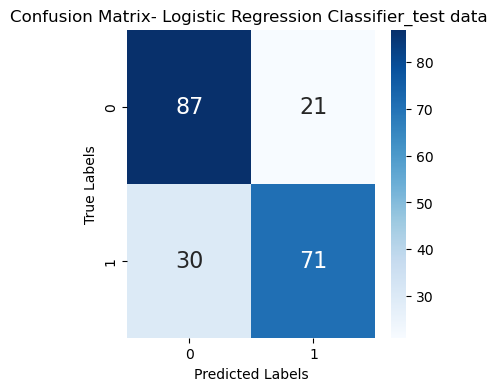

In [375]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_lrmodel_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier_test data ')


In [376]:
cm_lrmodel_train=confusion_matrix(y_train, y_dt_pred_train)

Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier_train data ')

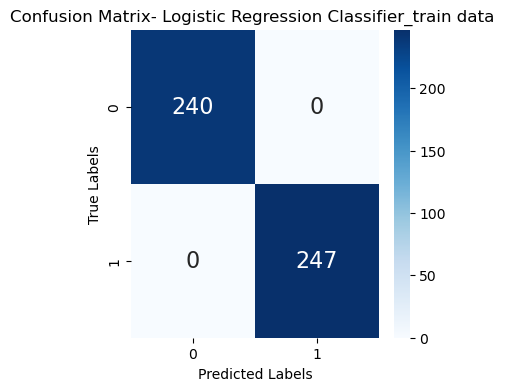

In [377]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_lrmodel_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier_train data ')


In [ ]:
#decision tree model

In [385]:
cm_dtmodel_train=confusion_matrix(y_train, y_dt_pred_train)

Text(0.5, 1.0, 'Confusion Matrix- DECISION TREE MODEL_train data ')

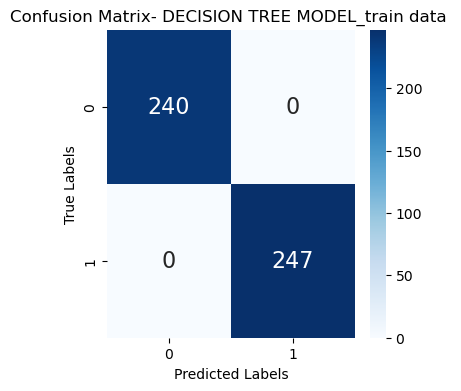

In [386]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dtmodel_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- DECISION TREE MODEL_train data ')


In [383]:
cm_dtmodel_test=confusion_matrix(y_test, y_dt_pred)

Text(0.5, 1.0, 'Confusion Matrix- DECISION TREE MODEL_test data ')

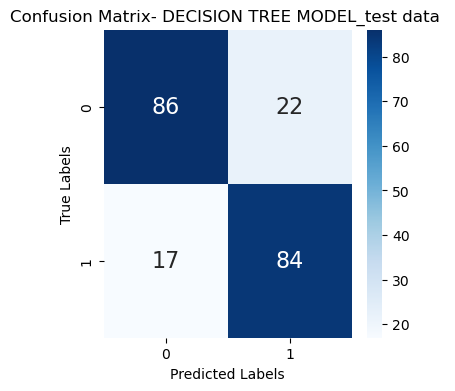

In [384]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dtmodel_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- DECISION TREE MODEL_test data ')


In [270]:
#lets use decsion tree model
print("Accuracy_train:", accuracy_score(y_train, y_dt_pred_train))
print("Accuracy_test:", accuracy_score(y_test, y_dt_pred))
print("Classification Report:\n", classification_report(y_test, y_dt_pred))


Accuracy_train: 1.0
Accuracy_test: 0.8277511961722488
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.80      0.85      0.83       101

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.83      0.83      0.83       209



In [272]:
confusion_matrix_train=confusion_matrix(y_train, y_dt_pred_train)

In [273]:
confusion_matrix_train

array([[240,   0],
       [  0, 247]], dtype=int64)

In [275]:
confusion_matrix_test=confusion_matrix(y_test, y_dt_pred)

In [279]:
y_test.value_counts()

Target
0    108
1    101
Name: count, dtype: int64

In [277]:
confusion_matrix_test

array([[87, 21],
       [15, 86]], dtype=int64)

In the confusion matrix we can see that 87 were no failiures were predicted right and 21 no failiures were predicted as failiures. and 15 failiures were predicted as not failiures, 86 failiures were predicted right.

In [278]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.80      0.85      0.83       101

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.83      0.83      0.83       209



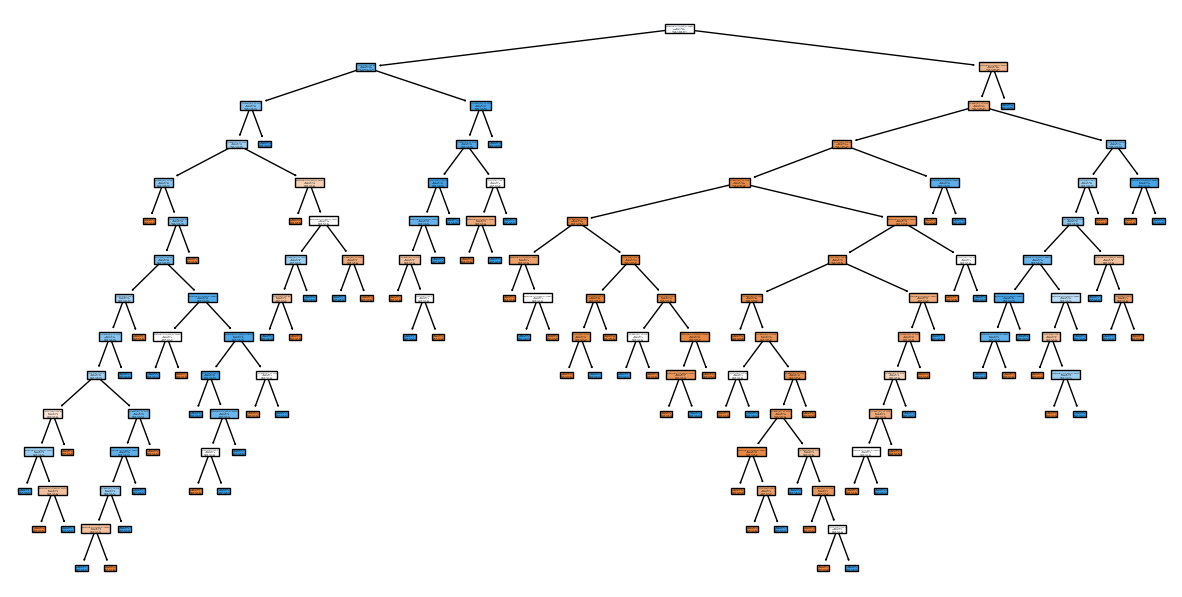

<Figure size 640x480 with 0 Axes>

In [267]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(dt_rusm,filled=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()
plt.savefig('new_image.jpg')


In [387]:
path=model1.cost_complexity_pruning_path(X_train,y_train)    # determine values for alpha
ccp_alphas= path.ccp_alphas   # extract  values for ccp alpha
ccp_alphas = ccp_alphas[:-1]  # extract the maxim

In [388]:
models =[]  # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for i in ccp_alphas:
    model2=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model2.fit(X_train,y_train)
    models.append(model2)

In [389]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0013067015120403218, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0013689253935660506, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001540041067761807, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0015917737134488953, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0017446619089329562, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0017600469345849226, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018200485346275901, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018379480379862412, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019164955509924713, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0023166429737271625, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002515862885472741, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0025272468804296315, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0027303292190355866, random_state=0),

Now let's graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha

In [289]:
np.arange(0.0,0.09,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])

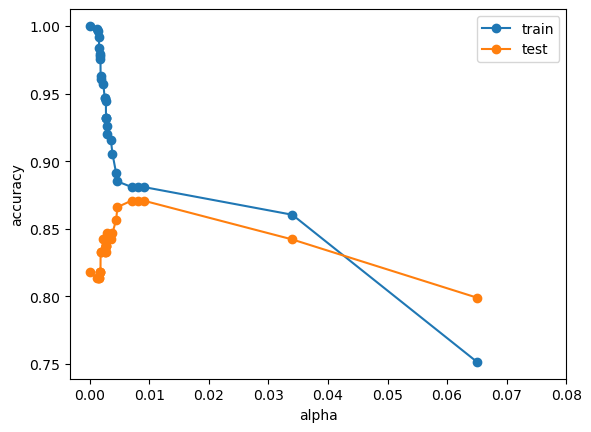

In [390]:
train_scores=[model.score(X_train,y_train) for model in models]
test_scores=[model.score(X_test,y_test) for model in models]


plt.plot(ccp_alphas,train_scores,marker='o',label='train')
plt.plot(ccp_alphas,test_scores,marker='o',label='test')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])

plt.legend()
plt.show()

In [391]:
def alpha_best(train_scores,test_scores):
    series= abs(pd.Series(train_scores)-pd.Series(test_scores))
    min_value= series.min()
    index=series.idxmin()
    alpha_best=ccp_alphas[index]
    return alpha_best
    

In [392]:
alpha_best(train_scores,test_scores)

0.0070401877383396904

In [294]:
series= abs(pd.Series(train_scores)-pd.Series(test_scores))
min_value= series.min()

In [295]:
series.idxmin()

23

In [296]:
min_value

0.01009009363056701

In [297]:
ccp_alphas[23]

0.0070401877383396904

In [393]:
model3 = DecisionTreeClassifier(random_state=42,ccp_alpha=0.0070401877383396904)

In [394]:
model3.fit(X_train,y_train)
train_score = model3.score(X_train,y_train)
test_score = model3.score(X_test,y_test)
print(f'Training Score {(train_score,2)}, Testing Score {(test_score,2)}')

Training Score (0.8809034907597536, 2), Testing Score (0.8708133971291866, 2)


In [396]:
ytest_pred = model3.predict(X_test)

cm_dtprune_test=confusion_matrix(y_test,ytest_pred)

In [399]:
y_train_pred=model3.predict(X_train)
cm_dtprune_train=confusion_matrix(y_train,y_train_pred)

Text(0.5, 1.0, 'Confusion Matrix- DECISION TREE MODEL after pruning_train data ')

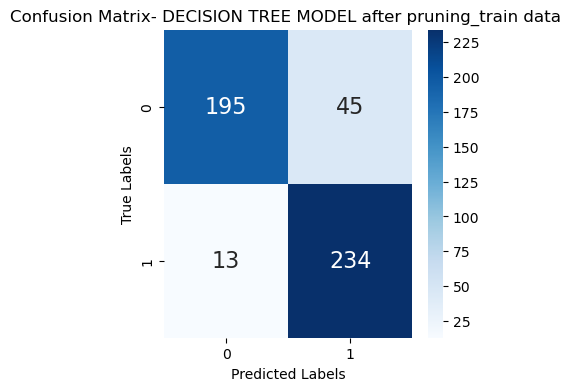

In [400]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dtprune_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- DECISION TREE MODEL after pruning_train data ')


Text(0.5, 1.0, 'Confusion Matrix- DECISION TREE MODEL after pruning_test data ')

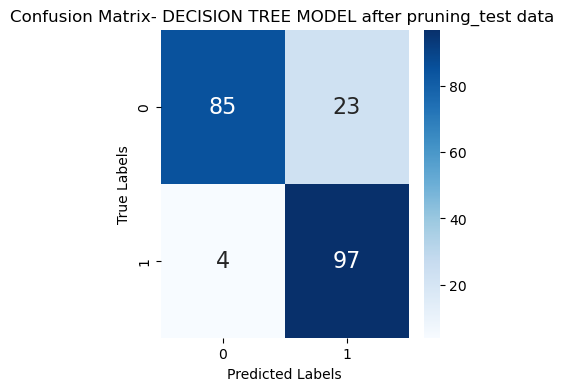

In [397]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_dtprune_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- DECISION TREE MODEL after pruning_test data ')


In [301]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86       108
           1       0.81      0.96      0.88       101

    accuracy                           0.87       209
   macro avg       0.88      0.87      0.87       209
weighted avg       0.88      0.87      0.87       209



In [401]:
print("Accuracy_train:", accuracy_score(y_train,y_train_pred))
print("Accuracy_test:", accuracy_score(y_test,ytest_pred))
print("Classification Report:\n", classification_report(y_test,ytest_pred))


Accuracy_train: 0.8809034907597536
Accuracy_test: 0.8708133971291866
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.86       108
           1       0.81      0.96      0.88       101

    accuracy                           0.87       209
   macro avg       0.88      0.87      0.87       209
weighted avg       0.88      0.87      0.87       209



# Cost Complexity Pruning Part 2: Cross Validation for Finding the Best Alpha
The graph we just drew suggested one values for alpha, 0.0070401877383396904 but another set of data might suggest another optimal value validating data with different sizes of training set and tesing set

Now will try with different train and test set using cross validation

In [302]:
from sklearn.model_selection import cross_val_score

<Axes: xlabel='tree'>

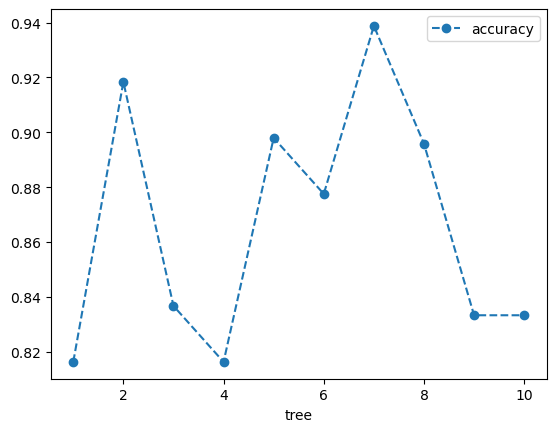

In [305]:
# now use 10-fold cross validation create 10 different training and testing datasets that are then used to train and test tree.
## Note:- We use 10-fold because we don't have tons of data..
scores=cross_val_score(model3,X_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(1,11),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [306]:
df

,tree,accuracy
0,1,0.816327
1,2,0.918367
2,3,0.836735
3,4,0.816327
4,5,0.897959
5,6,0.877551
6,7,0.938776
7,8,0.895833
8,9,0.833333
9,10,0.833333


In [307]:
scores.mean()

0.866454081632653

In [308]:
scores

array([0.81632653, 0.91836735, 0.83673469, 0.81632653, 0.89795918,
       0.87755102, 0.93877551, 0.89583333, 0.83333333, 0.83333333])

The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that alpha is positive to the datasets. So, insted of picking a single Training dataset and single Testing dataset, let's use Cross Validation to find the optimal value or ccp_alpha.

In [309]:
ccp_alphas

array([0.        , 0.0013067 , 0.00136893, 0.00154004, 0.00159177,
       0.00174466, 0.00176005, 0.00182005, 0.00183795, 0.0019165 ,
       0.00231664, 0.00251586, 0.00252725, 0.00273033, 0.00273785,
       0.00273785, 0.00273785, 0.00287834, 0.00291208, 0.00355921,
       0.0038274 , 0.00444276, 0.00466345, 0.00704019, 0.00809719,
       0.0090419 , 0.03401601, 0.06501805])

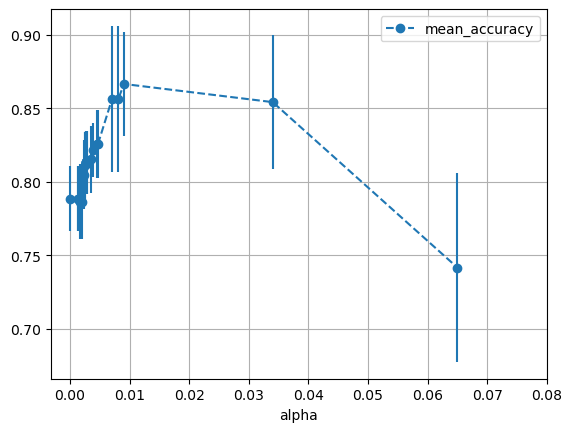

In [313]:
# create an array to store the results of each fold during cross validations
alpha_loop_values=[]

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (The accuracy) for each call to cross_val_score in alpha_loop_values

for i in ccp_alphas:
    model4=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores=cross_val_score(model4,X_train,y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores for each candidate  value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
plt.xticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
plt.grid()
plt.show()

In [312]:
np.arange(0,0.09,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])

In [314]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.788407,0.022023
1,0.001307,0.788407,0.022023
2,0.001369,0.788407,0.022023
3,0.001540,0.788407,0.022023
4,0.001592,0.788407,0.022023
5,0.001745,0.786345,0.025491
6,0.001760,0.786345,0.025491
7,0.001820,0.786345,0.025491
8,0.001838,0.786345,0.025491
9,0.001916,0.786345,0.025491


## Now will find the ideal CCP value


In [315]:
alpha_results[(alpha_results['alpha']>0.009) & (alpha_results['alpha']<0.0091)]['alpha'].values

array([0.0090419])

## Building, Evaluating, Drawing, and Interpreting the Final Classification Tree¶

In [316]:
model5=DecisionTreeClassifier(random_state=42,ccp_alpha=0.0090419 )

In [317]:
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0090419, random_state=42)

In [318]:
# Predicting for training and testing 
ytrain_pred = model5.predict(X_train)
ytest_pred = model5.predict(X_test)

In [319]:
# Model Evaluation

train_score = model5.score(X_train,y_train)
test_score = model5.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.88, Testing Score 0.87


In [320]:
confusion_matrix(y_train,ytrain_pred)

array([[195,  45],
       [ 13, 234]], dtype=int64)

In [321]:
confusion_matrix(y_test,ytest_pred)

array([[85, 23],
       [ 4, 97]], dtype=int64)

In [322]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       240
           1       0.84      0.95      0.89       247

    accuracy                           0.88       487
   macro avg       0.89      0.88      0.88       487
weighted avg       0.89      0.88      0.88       487



In [323]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86       108
           1       0.81      0.96      0.88       101

    accuracy                           0.87       209
   macro avg       0.88      0.87      0.87       209
weighted avg       0.88      0.87      0.87       209



# We see that pruned tree is better classifing over full sized tree.

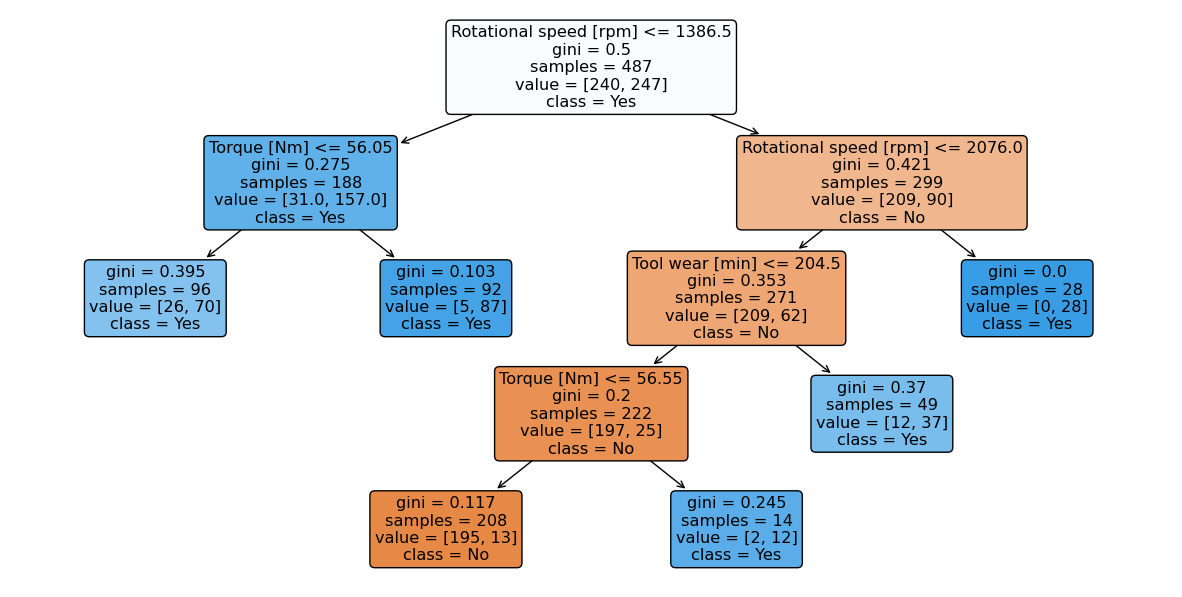

In [325]:
plt.figure(figsize=(15,7.5))
plot_tree(model5,filled=True,rounded=True,class_names=['No','Yes'],feature_names=X.columns.to_list())
plt.show()

In [ ]:
#lets try random forest model

In [403]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', y.value_counts())
print('Resample dataset shape', y_rus.value_counts())

original dataset shape: Target
0    9652
1     348
Name: count, dtype: int64
Resample dataset shape Target
0    348
1    348
Name: count, dtype: int64


In [402]:
X=final_features_1.drop('Target',axis=1)
y=final_features_1['Target']

In [404]:
X_train,X_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=0.3,random_state=0)

In [406]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(n_estimators=100,random_state=0)


In [407]:
model5.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [408]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [409]:
train_mse

0.07802874743326489

In [410]:
test_mse

0.09090909090909091

In [411]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.6878205128205128
test_r-squared =0.6359552621928861


In [412]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(estimator=model5, param_distributions=param_dist,  cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}


In [413]:
model6 = RandomForestRegressor(n_estimators = 300,min_samples_split =5, min_samples_leaf=4,max_features ='log2',max_depth =30)

In [415]:
model6.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [416]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.6878205128205128
test_r-squared =0.6359552621928861


In [417]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Grid Search Cross-Validation object
grid_search = GridSearchCV(estimator=model5, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_